In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
pants_size='Pants Size Waist'
subject_number = 'Subject Number'
age = 'Age (Years)'
gender = 'Gender'
height = 'Reported Height (cm)'
weight = 'Reported Weight (kg)'
shoe_size = 'Shoe Size NL'
pants_size='Pants Size Waist'
#measurements
waist = 'Waist Circumference, Pref (mm)'
waist_pred='Waist Circumference, Pred (mm)'
neck='Neck Base Circumference (mm)'
neck_pred='Neck Base Circumference, Pred (mm)'
hip= 'Hip Circumference, Maximum (mm)'
hip_pred='Hip Circumference, Pred (mm)'
chest="Chest Circumference (mm)"
under_bust='Bust/Chest Circumference Under Bust (mm)'
chest_pred='Chest Circumference, Pred (mm)'
crotch_height='Crotch Height (mm)'
crotch_height_pred='Crotch Height Pred (mm)'
shoe_size_italy="Shoe Size IT"

upper_chest='Chest Girth (Chest Circumference at Scye) (mm)'
italy_upper_chest="Chest Girth at Scye (Chest Circumference at Scye) (mm)"
malleolus_height_outer="Ankle Ht Rt (Malleolus, Lateral) (mm)"
malleolus_height_inner='Malleolus Med Rt (mm)'
outer_inseam='Outer Inseam'


thigh='Thigh Circumference (mm)'
shoulder_breadth='Shoulder Breadth (mm)'
waist_floor='Waist Height, Preferred (mm)'
arm_length='Arm Length (Shoulder to Wrist) (mm)'

In [27]:
female_pred=pd.read_csv('female_pred.csv',encoding='utf-8')
female_pred.head()

,"Waist Circumference, Pref (mm)",Chest Girth (Chest Circumference at Scye) (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm)
0,772.271729,890.505737,424.592468,1018.977661,746.238220
1,711.210876,827.257324,417.134003,931.596436,759.283447
2,832.473511,930.114197,441.147949,1035.388428,820.885620
3,831.886108,928.256042,439.499725,1063.490356,809.721558
4,1228.586548,1196.963379,512.327515,1310.334595,767.647949


In [28]:
y_test=pd.read_csv('y_test.csv',encoding='utf-8')
female_pred.columns=[waist_pred,chest_pred, neck_pred,hip_pred,crotch_height_pred]
set=[y_test,female_pred]
join=pd.concat(set,axis=1)

In [29]:
join.head()


,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Bust/Chest Circumference Under Bust (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm),"Waist Circumference, Pred (mm)","Chest Circumference, Pred (mm)","Neck Base Circumference, Pred (mm)","Hip Circumference, Pred (mm)",Crotch Height Pred (mm)
0,696.0,846.0,705.0,410.0,911.0,678.0,521.0,392.0,889.0,514.0,820.0,62.00,68.00,772.271729,890.505737,424.592468,1018.977661,746.238220
1,760.0,889.0,735.0,401.0,901.0,789.0,505.0,377.0,978.0,598.0,799.0,62.00,70.00,711.210876,827.257324,417.134003,931.596436,759.283447
2,684.0,805.0,682.0,435.0,925.0,739.0,480.0,366.0,937.0,555.0,802.0,58.00,71.00,832.473511,930.114197,441.147949,1035.388428,820.885620
3,774.0,951.0,812.0,420.0,972.0,793.0,553.0,404.0,1020.0,560.0,832.0,69.37,83.58,831.886108,928.256042,439.499725,1063.490356,809.721558
4,1103.0,1339.0,1057.0,430.0,1226.0,772.0,689.0,490.0,1014.0,595.0,1147.0,64.58,82.92,1228.586548,1196.963379,512.327515,1310.334595,767.647949


In [30]:
female_pred=pd.read_csv('../data/female/female_pred.csv',encoding='utf-8')
female_target=pd.read_csv('../data/female/female_target.csv')
female_pred_body_shape=pd.read_csv('../data/female/female_pred_without_shape.csv',encoding='utf-8')
female_target_body_shape=pd.read_csv('../data/female/female_target_without_shape.csv',encoding='utf-8')


In [31]:
def plot_box_two(arr_1,arr_2,column_1,column_2):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.boxplot([arr_1,arr_2])
    plt.xticks([1, 2], [column_1, column_2], rotation=10)
    plt.show()

In [32]:
def plot_error_distribution(array,title):
    plt.subplots(figsize=(8,5))
    #Set X-Axis range
    
    plt.title('Model Error Distribution: '+ title)
    plt.ylabel('No. of Predictions')
    plt.xlabel('Error (cm)')
    plt.hist(array)
    plt.show()

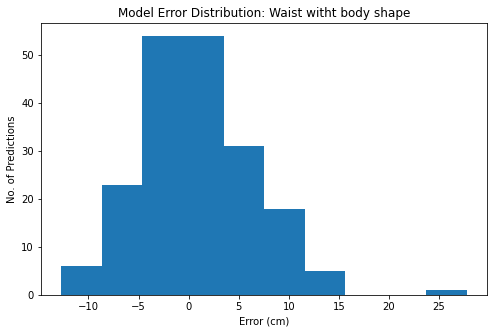

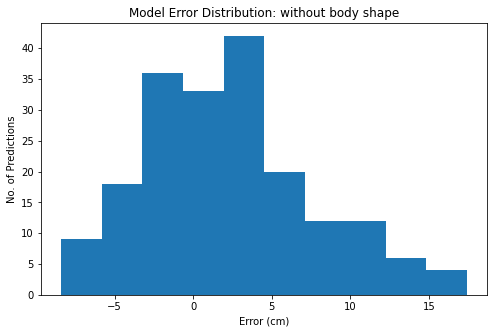

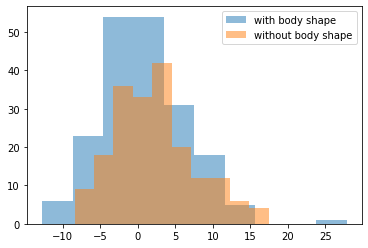

In [33]:
waist_target_arr=female_target[waist].to_numpy()
waist_pred_arr=female_pred[waist].to_numpy()
waist_error=(np.subtract(waist_target_arr,waist_pred_arr))
plot_error_distribution(waist_error,"Waist witht body shape")
#plot_box_two(waist_target_arr,waist_pred_arr,waist,"Waist Prediction")
# plot_box_two(waist_error,[],'Waist Error',"")

waist_target_arr=female_target_body_shape[waist].to_numpy()
waist_pred_arr=female_pred_body_shape[waist].to_numpy()
waist_error_u=(np.subtract(waist_target_arr,waist_pred_arr))
plot_error_distribution(waist_error_u,"without body shape")
# plot_box_two(waist_target_arr,waist_pred_arr,waist,"Waist Prediction")
plt.hist(waist_error, alpha=0.5)

plt.hist(waist_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_error_distribution(waist_error_u)
# plot_box_two(waist_target_arr,waist_pred_arr,waist,"Waist Prediction")


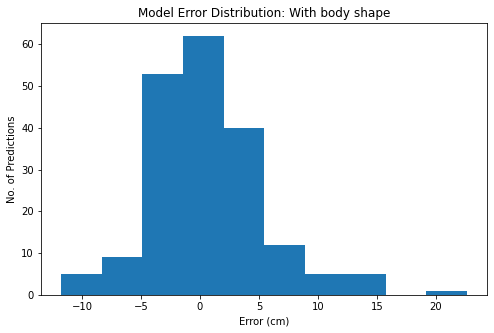

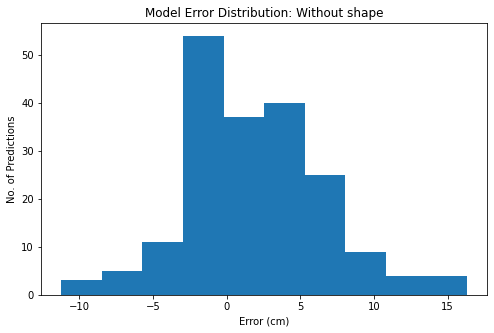

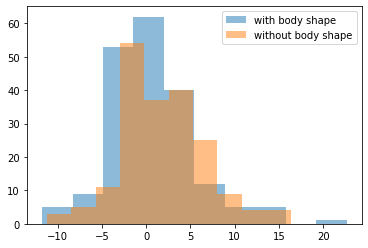

In [34]:
chest_target_arr=female_target[chest].to_numpy()
chest_pred_arr=female_pred[chest].to_numpy()
chest_error=(np.subtract(chest_target_arr,chest_pred_arr))
plot_error_distribution(chest_error,"With body shape")
# plot_box_two(chest_target_arr,chest_pred_arr,chest,'Chest Prediction')
# plot_box_two(chest_error,[],'Chest Error',"")

chest_target_arr=female_target_body_shape[chest].to_numpy()
chest_pred_arr=female_pred_body_shape[chest].to_numpy()
chest_error_u=(np.subtract(chest_target_arr,chest_pred_arr))
plot_error_distribution(chest_error_u,"Without shape")
plt.hist(chest_error, alpha=0.5)

plt.hist(chest_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(chest_target_arr,chest_pred_arr,chest,'Chest Prediction')

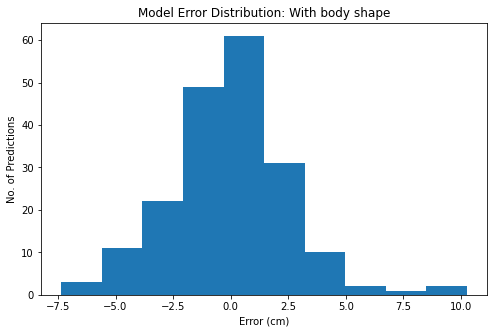

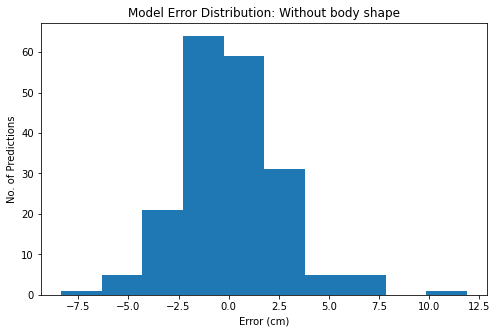

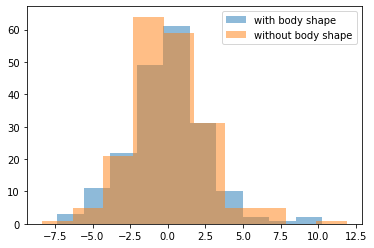

In [35]:
neck_target_arr=female_target[neck].to_numpy()
neck_pred_arr=female_pred[neck].to_numpy()
neck_error=(np.subtract(neck_target_arr,neck_pred_arr))
plot_error_distribution(neck_error,"With body shape")
# plot_box_two(neck_target_arr,neck_pred_arr,neck,'neck_pred')

neck_target_arr=female_target_body_shape[neck].to_numpy()
neck_pred_arr=female_pred_body_shape[neck].to_numpy()
neck_error_u=(np.subtract(neck_target_arr,neck_pred_arr))
plot_error_distribution(neck_error_u,"Without body shape")
plt.hist(neck_error, alpha=0.5)

plt.hist(neck_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(neck_target_arr,neck_pred_arr,neck,'neck_pred')
# plot_box_two(neck_error,[],'Neck Error',"")

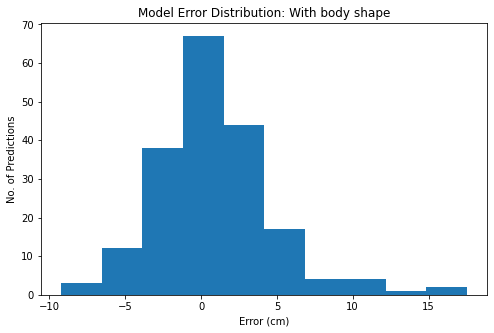

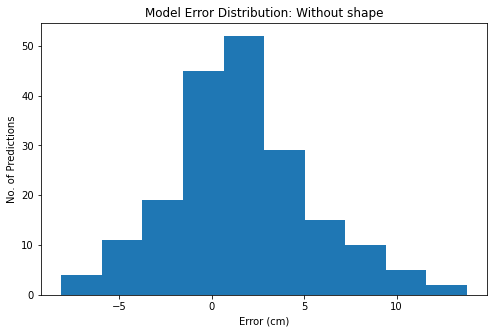

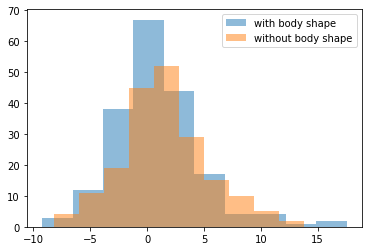

In [36]:
chest_target_arr=female_target[under_bust].to_numpy()
chest_pred_arr=female_pred[under_bust].to_numpy()
chest_error=(np.subtract(chest_target_arr,chest_pred_arr))
plot_error_distribution(chest_error,"With body shape")
# plot_box_two(chest_target_arr,chest_pred_arr,chest,'Chest Prediction')
# plot_box_two(chest_error,[],'Chest Error',"")

chest_target_arr=female_target_body_shape[under_bust].to_numpy()
chest_pred_arr=female_pred_body_shape[under_bust].to_numpy()
chest_error_u=(np.subtract(chest_target_arr,chest_pred_arr))
plot_error_distribution(chest_error_u,"Without shape")
plt.hist(chest_error, alpha=0.5)

plt.hist(chest_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(chest_target_arr,chest_pred_arr,chest,'Chest Prediction')

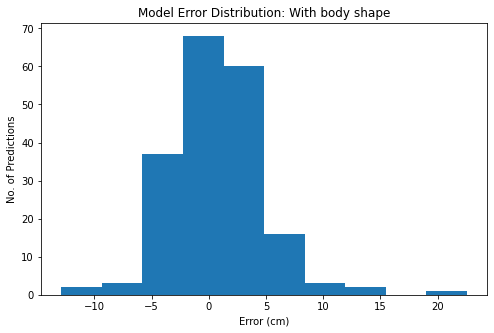

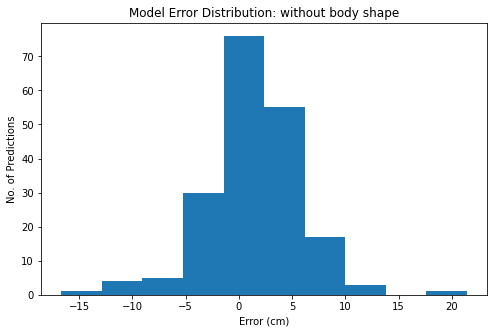

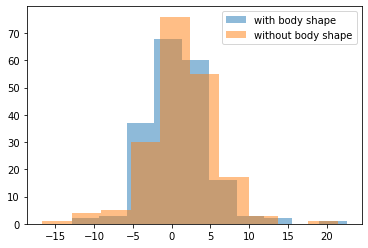

In [37]:
hip_target_arr=female_target[hip].to_numpy()
hip_pred_arr=female_pred[hip].to_numpy()
hip_error=(np.subtract(hip_target_arr,hip_pred_arr))
plot_error_distribution(hip_error,"With body shape")
# plot_box_two(hip_target_arr,hip_pred_arr,hip,"hip_pred")
# plot_box_two(hip_error,[],'Hip Error',"")

hip_target_arr=female_target_body_shape[hip].to_numpy()
hip_pred_arr=female_pred_body_shape[hip].to_numpy()
hip_error_u=(np.subtract(hip_target_arr,hip_pred_arr))
plot_error_distribution(hip_error_u,"without body shape")
plt.hist(hip_error, alpha=0.5)

plt.hist(hip_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(hip_target_arr,hip_pred_arr,hip,"hip_pred")
# plot_box_two(hip_error,[],'Hip Error',"")

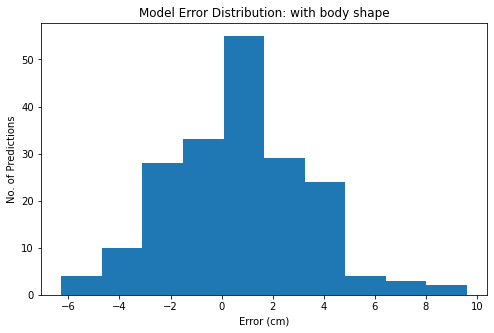

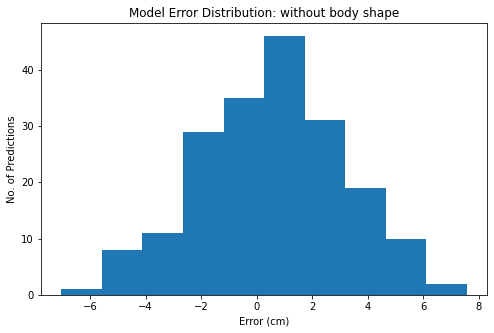

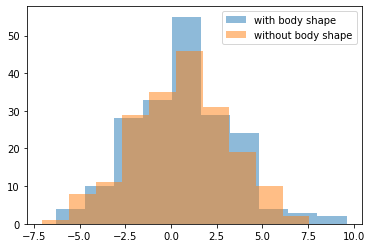

In [38]:
crotch_target_arr=female_target[crotch_height].to_numpy()
crotch_pred_arr=female_pred[crotch_height].to_numpy()
crotch_error=(np.subtract(crotch_target_arr,crotch_pred_arr))
plot_error_distribution(crotch_error,"with body shape")
# plot_box_two(crotch_target_arr,crotch_pred_arr,crotch_height,"crotch_height_pred")
# plot_box_two(crotch_error,[],'Crotch error',"")
crotch_target_arr=female_target_body_shape[crotch_height].to_numpy()
crotch_pred_arr=female_pred_body_shape[crotch_height].to_numpy()
crotch_error_u=(np.subtract(crotch_target_arr,crotch_pred_arr))
plot_error_distribution(crotch_error_u,"without body shape")
plt.hist(crotch_error, alpha=0.5)

plt.hist(crotch_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(crotch_target_arr,crotch_pred_arr,crotch_height,"crotch_height_pred")

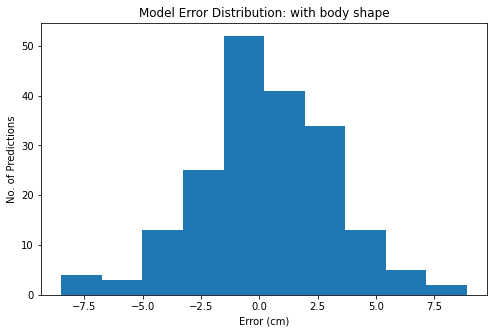

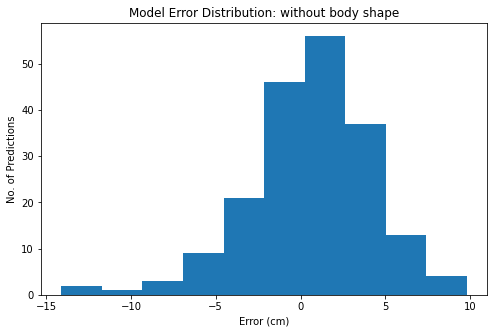

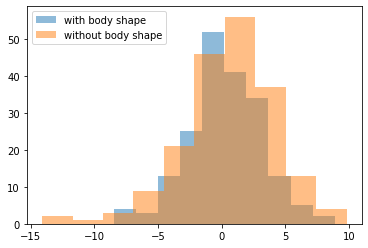

In [39]:
thigh_target_arr=female_target[thigh].to_numpy()
thigh_pred_arr=female_pred[thigh].to_numpy()
thigh_error=(np.subtract(thigh_target_arr,thigh_pred_arr))
plot_error_distribution(thigh_error,"with body shape")
# plot_box_two(thigh_target_arr,thigh_pred_arr,thigh,"thigh_pred")

thigh_target_arr=female_target_body_shape[thigh].to_numpy()
thigh_pred_arr=female_pred_body_shape[thigh].to_numpy()
thigh_error_u=(np.subtract(thigh_target_arr,thigh_pred_arr))
plot_error_distribution(thigh_error_u,"without body shape")
plt.hist(thigh_error, alpha=0.5)

plt.hist(thigh_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(thigh_target_arr,thigh_pred_arr,thigh,"thigh_pred")

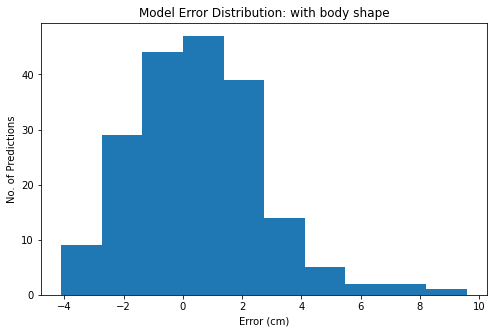

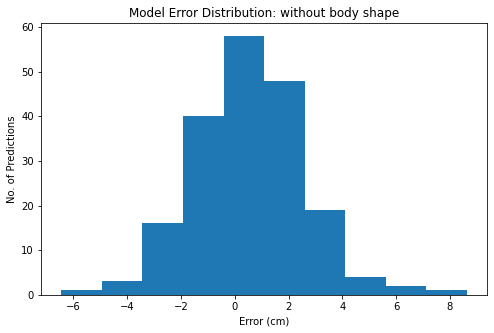

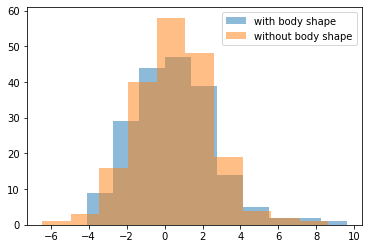

In [40]:

shoulder_target_arr=female_target[shoulder_breadth].to_numpy()
shoulder_pred_arr=female_pred[shoulder_breadth].to_numpy()
shoulder_error=(np.subtract(shoulder_target_arr,shoulder_pred_arr))
plot_error_distribution(shoulder_error,"with body shape")
# plot_box_two(shoulder_target_arr,shoulder_pred_arr,shoulder_breadth,"shoulder_breadth_pred")


shoulder_target_arr=female_target_body_shape[shoulder_breadth].to_numpy()
shoulder_pred_arr=female_pred_body_shape[shoulder_breadth].to_numpy()
shoulder_error_u=(np.subtract(shoulder_target_arr,shoulder_pred_arr))
plot_error_distribution(shoulder_error_u,"without body shape")
plt.hist(shoulder_error, alpha=0.5)

plt.hist(shoulder_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(shoulder_target_arr,shoulder_pred_arr,shoulder_breadth,"shoulder_breadth_pred")

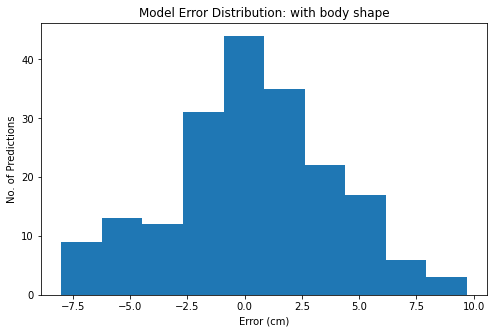

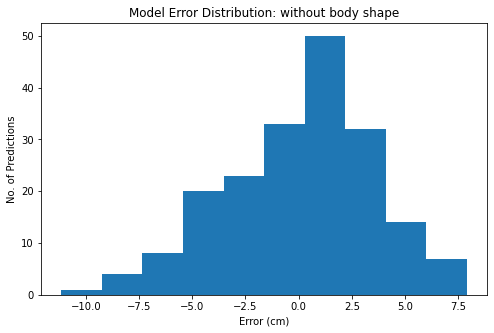

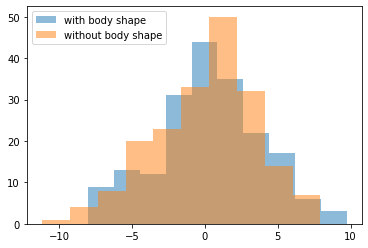

In [41]:

waist_floor_target_arr=female_target[waist_floor].to_numpy()
waist_floor_pred_arr=female_pred[waist_floor].to_numpy()
waist_floor_error=(np.subtract(waist_floor_target_arr,waist_floor_pred_arr))
plot_error_distribution(waist_floor_error,"with body shape")
# plot_box_two(waist_floor_target_arr,waist_floor_pred_arr,waist_floor,"waist_floor_pred")


waist_floor_target_arr=female_target_body_shape[waist_floor].to_numpy()
waist_floor_pred_arr=female_pred_body_shape[waist_floor].to_numpy()
waist_floor_error_u=(np.subtract(waist_floor_target_arr,waist_floor_pred_arr))
plot_error_distribution(waist_floor_error_u,"without body shape")
plt.hist(waist_floor_error, alpha=0.5)

plt.hist(waist_floor_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(waist_floor_target_arr,waist_floor_pred_arr,waist_floor,"waist_floor_pred")

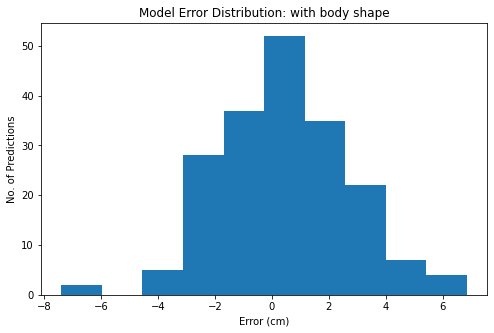

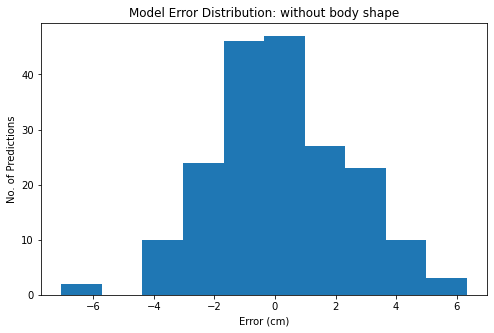

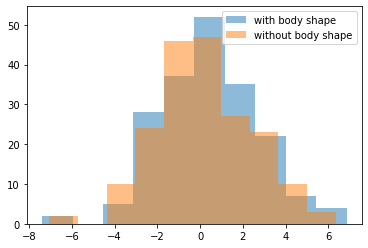

In [42]:

arm_target_arr=female_target[arm_length].to_numpy()
arm_pred_arr=female_pred[arm_length].to_numpy()
arm_error=(np.subtract(arm_target_arr,arm_pred_arr))
plot_error_distribution(arm_error,"with body shape")
# plot_box_two(arm_target_arr,arm_pred_arr,arm_length,"arm_length_pred")
# plot_box_two(arm_error,[],'Shoulder error',"")


arm_target_arr=female_target_body_shape[arm_length].to_numpy()
arm_pred_arr=female_pred_body_shape[arm_length].to_numpy()
arm_error_u=(np.subtract(arm_target_arr,arm_pred_arr))
plot_error_distribution(arm_error_u,"without body shape")
plt.hist(arm_error, alpha=0.5)

plt.hist(arm_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])
# plot_box_two(arm_target_arr,arm_pred_arr,arm_length,"arm_length_pred")
 


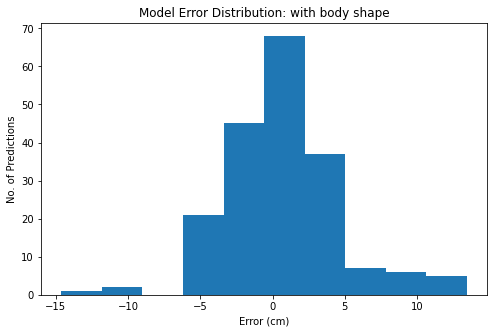

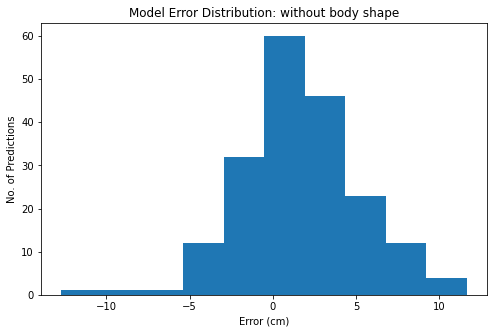

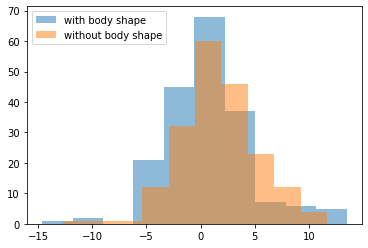

In [43]:

upper_chest_target_arr=female_target[upper_chest].to_numpy()
upper_chest_pred_arr=female_pred[upper_chest].to_numpy()
upper_chest_error=(np.subtract(upper_chest_target_arr,upper_chest_pred_arr))
plot_error_distribution(upper_chest_error,"with body shape")
# plot_box_two(arm_target_arr,arm_pred_arr,arm_length,"arm_length_pred")
# plot_box_two(arm_error,[],'Shoulder error',"")


upper_chest_target_arr=female_target_body_shape[upper_chest].to_numpy()
upper_chest_pred_arr=female_pred_body_shape[upper_chest].to_numpy()
upper_chest_error_u=(np.subtract(upper_chest_target_arr,upper_chest_pred_arr))
plot_error_distribution(upper_chest_error_u,"without body shape")
plt.hist(upper_chest_error, alpha=0.5)

plt.hist(upper_chest_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])

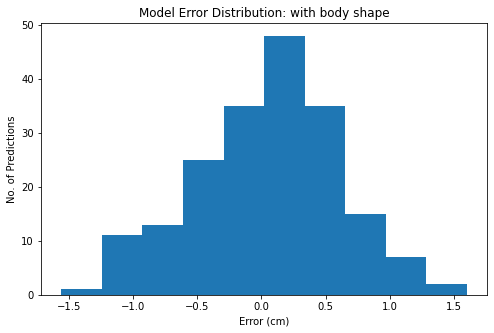

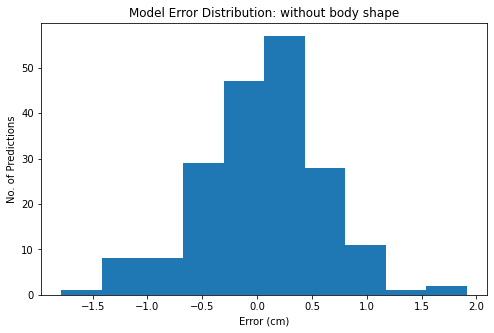

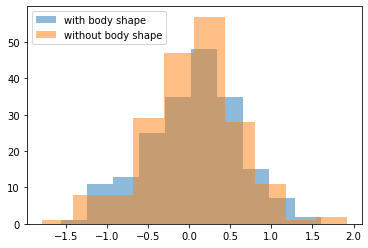

In [44]:

malleolus_outer_target_arr=female_target[malleolus_height_outer].to_numpy()
malleolus_outer_pred_arr=female_pred[malleolus_height_outer].to_numpy()
malleolus_outer_error=(np.subtract(malleolus_outer_target_arr,malleolus_outer_pred_arr))
plot_error_distribution(malleolus_outer_error,"with body shape")
# plot_box_two(arm_target_arr,arm_pred_arr,arm_length,"arm_length_pred")
# plot_box_two(arm_error,[],'Shoulder error',"")


malleolus_outer_target_arr=female_target_body_shape[malleolus_height_outer].to_numpy()
malleolus_outer_pred_arr=female_pred_body_shape[malleolus_height_outer].to_numpy()
malleolus_outer_error_u=(np.subtract(malleolus_outer_target_arr,malleolus_outer_pred_arr))
plot_error_distribution(malleolus_outer_error_u,"without body shape")
plt.hist(malleolus_outer_error, alpha=0.5)

plt.hist(malleolus_outer_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])

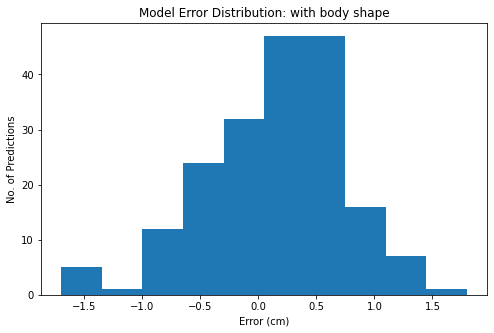

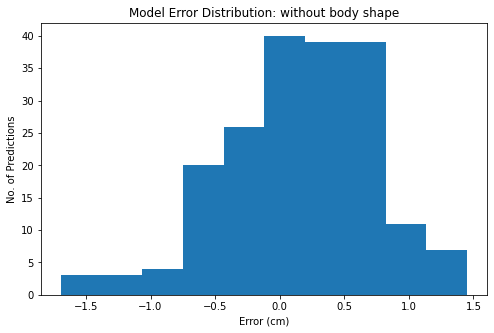

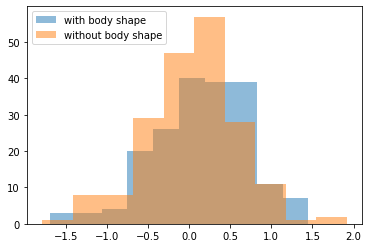

In [45]:

malleolus_inner_target_arr=female_target[malleolus_height_inner].to_numpy()
malleolus_inner_pred_arr=female_pred[malleolus_height_inner].to_numpy()
malleolus_inner_error=(np.subtract(malleolus_inner_target_arr,malleolus_inner_pred_arr))
plot_error_distribution(malleolus_inner_error,"with body shape")
# plot_box_two(arm_target_arr,arm_pred_arr,arm_length,"arm_length_pred")
# plot_box_two(arm_error,[],'Shoulder error',"")


malleolus_inner_target_arr=female_target_body_shape[malleolus_height_inner].to_numpy()
malleolus_inner_pred_arr=female_pred_body_shape[malleolus_height_inner].to_numpy()
malleolus_inner_error_u=(np.subtract(malleolus_inner_target_arr,malleolus_inner_pred_arr))
plot_error_distribution(malleolus_inner_error_u,"without body shape")
plt.hist(malleolus_inner_error_u, alpha=0.5)

plt.hist(malleolus_outer_error_u, alpha=0.5)
plt.legend(['with body shape','without body shape'])